In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [ ]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# **EDA**

In [ ]:
data = data.rename({'Unnamed: 0':'State'}, axis = 1)

In [ ]:
data.info() #50 rows, 5 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data.tail()

,State,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [ ]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
data[data.duplicated()] #no duplicate values

,State,Murder,Assault,UrbanPop,Rape


In [ ]:
data1 = data.drop(['State'], axis=1) #dropping unnecessary column
data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
data1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


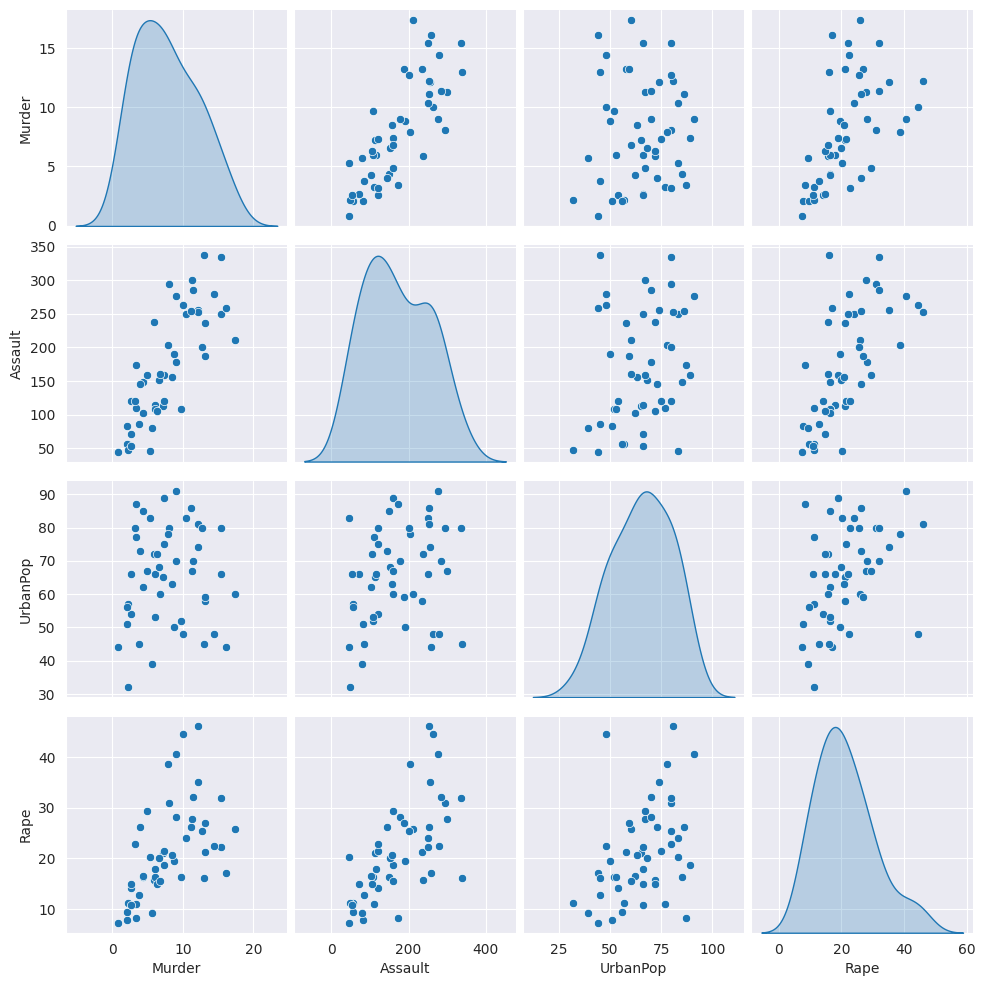

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1, diag_kind="kde")

<Figure size 1000x500 with 0 Axes>

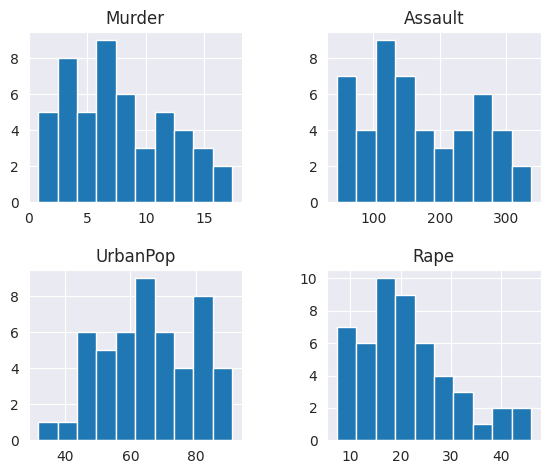

In [ ]:
plt.figure(figsize=(10, 5))
data1.hist()
plt.subplots_adjust(left=0.1,
                    bottom=0.15,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)

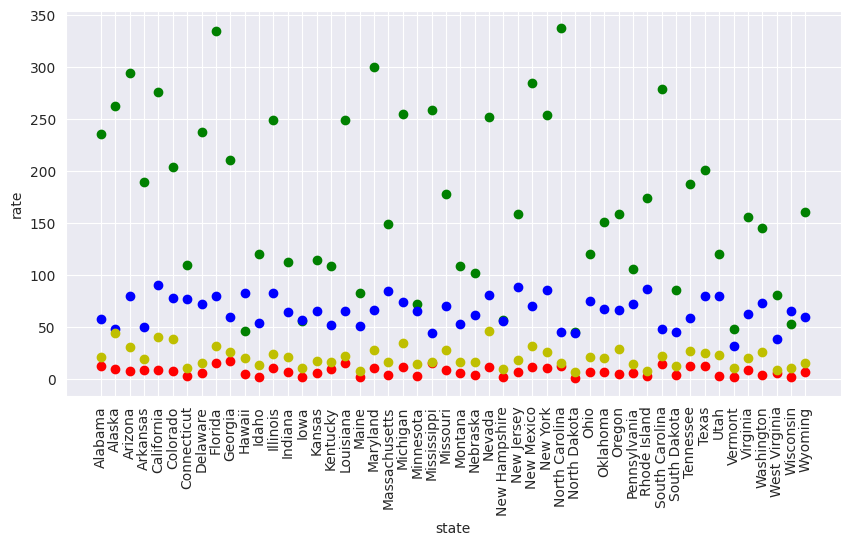

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data.State, data.Murder, color='r')
plt.scatter(data.State, data.Assault, color='g')
plt.scatter(data.State, data.UrbanPop, color='b')
plt.scatter(data.State, data.Rape, color='y')
plt.xticks(rotation=90)
plt.xlabel('state')
plt.ylabel('rate')
plt.show()

# **Hierarchical Clustering**

Agglomerative Clustering

In [ ]:
#normalization function
def norm_func(i) : #defining function
  x = (i-i.min())/i.max()-i.min() #x is normalized value
  return x

In [ ]:
#we are applying above function to our dataset.
df_norm = norm_func(data1)
df_norm #normalised values

,Murder,Assault,UrbanPop,Rape
0,-0.087356,-44.433234,-31.714286,-6.997826
1,-0.271264,-44.353116,-31.824176,-6.491304
2,-0.380460,-44.261128,-31.472527,-6.784783
3,-0.340230,-44.569733,-31.802198,-7.034783
4,-0.328736,-44.314540,-31.351648,-6.576087
5,-0.391954,-44.528190,-31.494505,-6.617391
6,-0.656322,-44.807122,-31.505495,-7.217391
7,-0.506897,-44.427300,-31.560440,-7.115217
8,0.039080,-44.139466,-31.472527,-6.765217
9,0.154023,-44.507418,-31.692308,-6.897826


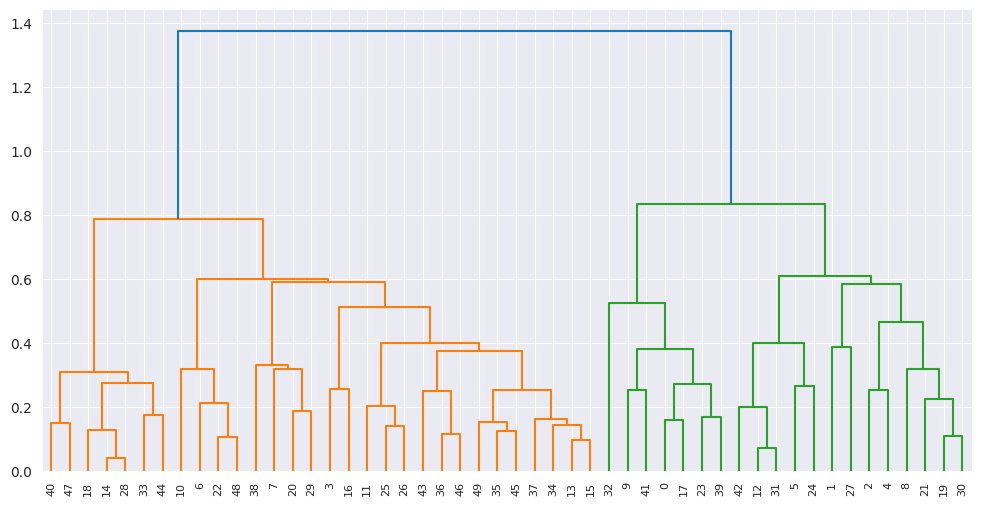

In [ ]:
#create dendrogram
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete')) #complete linkage
#x-axis-states, y-axis-distance

# **Fitting a model**

In [ ]:
#creating clusters
HC = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
#no. of clusters = 4, euclidean distance

In [ ]:
HC.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [ ]:
y_hc = HC.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 3, 1, 1, 2, 3, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 1, 1])

In [ ]:
data['h_clusterid'] = y_hc

In [ ]:
data

,State,Murder,Assault,UrbanPop,Rape,clusterid_new,h_clusterid
0,Alabama,13.2,236,58,21.2,1,2
1,Alaska,10.0,263,48,44.5,2,0
2,Arizona,8.1,294,80,31.0,2,0
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,2,0
5,Colorado,7.9,204,78,38.7,2,0
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,2,0
9,Georgia,17.4,211,60,25.8,1,2


In [ ]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

<ipython-input-41-d8e7b7caeeae>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape,clusterid_new
,,mean,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308,2.000000
1,1,5.530435,129.434783,68.913043,17.786957,0.826087
2,2,14.671429,251.285714,54.285714,21.685714,1.000000
3,3,2.700000,65.142857,46.285714,9.885714,3.000000


In [ ]:
data['h_clusterid'].value_counts()

1    23
0    13
2     7
3     7
Name: h_clusterid, dtype: int64

In [ ]:
Data1 = data.sort_values('h_clusterid')
Data1.iloc[:, [0, -1]]

,State,h_clusterid
24,Missouri,0
1,Alaska,0
2,Arizona,0
21,Michigan,0
4,California,0
5,Colorado,0
27,Nevada,0
19,Maryland,0
8,Florida,0
42,Texas,0


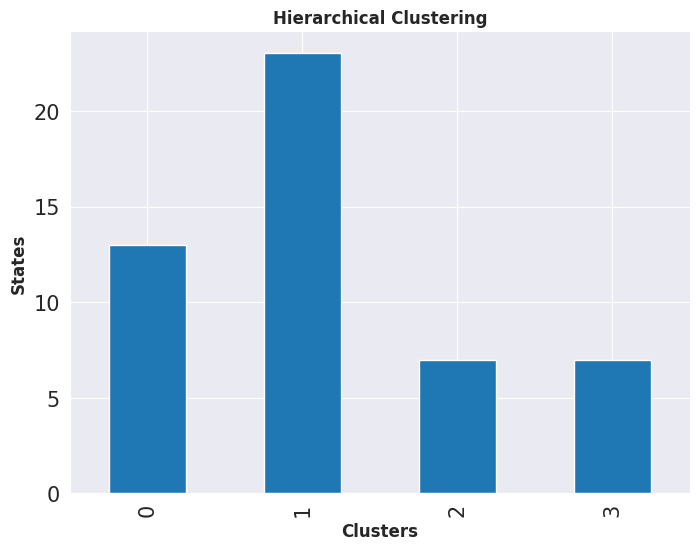

In [ ]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
data.groupby(['h_clusterid']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# **K-Means Clustering**

In [79]:
scaler = StandardScaler() #storing in variable
scaled_df = scaler.fit_transform(data.iloc[:, 1:]) #fitting and transforming the data
scaled_df #scaled data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

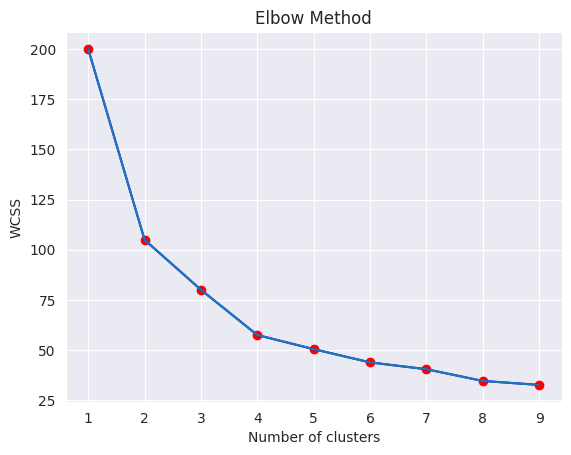

In [80]:
#using data standardized by StandardScaler
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color = 'blue')
plt.scatter(range(1,10),wcss,color='red')
#plt.plot(x axis, y axis)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#from above graph choice of 4 clusters seems to be fair

In [81]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [82]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [83]:
data['clusterid_new'] = clusters_new.labels_
data

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [84]:
clusters_new.cluster_centers_ #checking centroids of clusters

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [85]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

<ipython-input-85-348825e5f3f9>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,3.600000,78.538462,52.076923,12.176923


In [86]:
data[data['clusterid_new']==3] #no. of records where crime rate is low

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


In [87]:
data[data['clusterid_new']==2] #no. of records where crime rate is high

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [88]:
data[data['clusterid_new']==1]

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [89]:
data[data['clusterid_new']==0]

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [90]:
data['clusterid_new'].value_counts()

0    16
2    13
3    13
1     8
Name: clusterid_new, dtype: int64

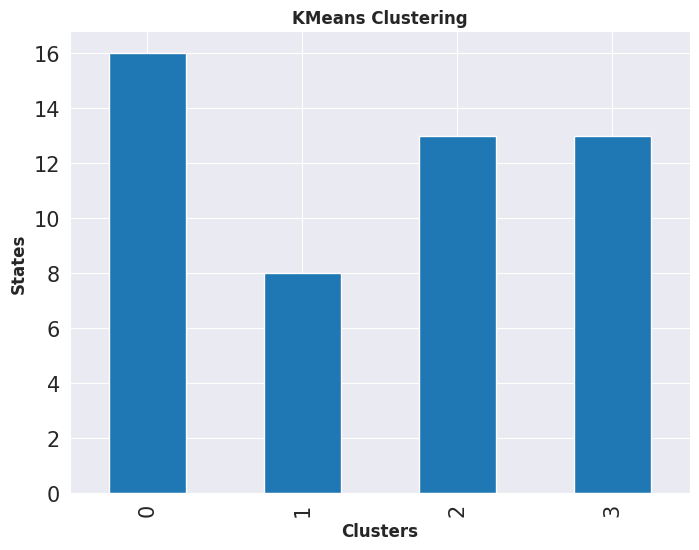

In [91]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 6))
data.groupby(['clusterid_new']).count()['State'].plot(kind='bar')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
#Cluster id 2 contains number ofstates where crime rate is high
#cluster id 3 contains number of states here crime rate is low

# **DBSCAN**

In [ ]:
#DBSCAN expects data in the form of an array/numpy representation
array = data1.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [ ]:
#doing standardization
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [ ]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [69]:
#-1 is outliers and there are 3 clusters
#Min >= D+1 where D is the number of columns.
#as we decrease eps, more outliers are formed as radius decreases.
model = DBSCAN(eps = 1.25, min_samples = 5)
model.fit_predict(X)

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [70]:
#noisy sample giving the label -1
model.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [71]:
cl = pd.DataFrame(model.labels_, columns = ['Cluster'])
cl

,Cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [72]:
clustered = pd.concat([data,cl], axis = 1)
clustered.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


In [73]:
#checking outliers
clustered[clustered['Cluster']== -1]

,State,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,-1
4,California,9.0,276,91,40.6,-1
8,Florida,15.4,335,80,31.9,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1
32,North Carolina,13.0,337,45,16.1,-1


In [74]:
clustered.groupby('Cluster').agg(['mean']).reset_index()

<ipython-input-74-5515f6873308>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  clustered.groupby('Cluster').agg(['mean']).reset_index()


,Cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,12.616667,287.000,64.833333,32.700000
1,0,14.720000,232.600,58.200000,23.720000
2,1,10.328571,263.000,76.857143,30.685714
3,2,5.243750,119.125,64.343750,16.625000


In [75]:
clustered['Cluster'].value_counts()

 2    32
 1     7
-1     6
 0     5
Name: Cluster, dtype: int64

In [76]:
clustered.mean()

<ipython-input-76-c5861b0e66a9>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clustered.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
Cluster       1.300
dtype: float64

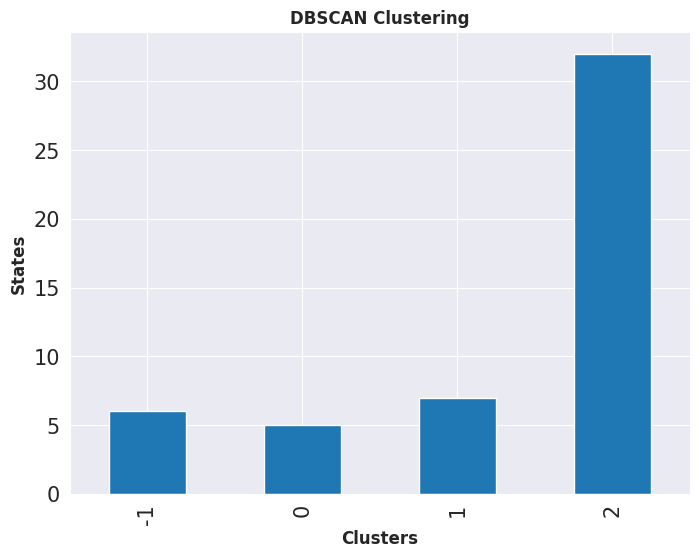

In [77]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 6))
clustered.groupby(['Cluster']).count()['State'].plot(kind='bar')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [ ]:
#we can see more than 50% of states are in cluster 2